In [ ]:
# MIT License
#
#@title Copyright (c) 2023 CCAI Community Authors { display-mode: "form" }
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# CCAI Tutorial Notebook Template
Author(s):
*   Jorge Montalvo, CCAI, jorge@climatechange.ai
*   Utkarsha Agwan, uagwan@berkeley.edu
*   Panos, panay1ot1s@climatechange.ai

This tutorial provides a beginner-friendly introduction to AC-OPF using a simple neural network based on PyTorch, a popular deep learning framework. By the end of this tutorial, you will have a basic understanding of how to model and solve AC-OPF problems using neural networks.




# Table of Contents

*   [Overview](#overview)
*   [Climate Impact](#climate-impact)
*   [Target Audience](#target-audience)
*   [Background & Prerequisites](#background-and-prereqs)
*   [Software Requirements](#software-requirements)
*   [Data Description](#data-description)
*   [Training](#training)
*   [Results & Discussion](#results-and-discussion)
*   [References](#references)


<a name="overview"></a>
# Overview

Welcome to this tutorial on AC Optimal Power Flow (OPF) using a simple neural network implemented in PyTorch. AC OPF is a fundamental problem in power system optimization, aiming to determine the optimal setpoints of generators and other control variables to minimize the operating cost while satisfying various operational constraints.

Traditionally, AC OPF has been solved using mathematical optimization techniques like nonlinear programming, but with the advancements in deep learning, neural networks have emerged as an alternative approach to address this complex problem. In this tutorial, we will focus on a simplified version of the AC OPF problem and demonstrate how to leverage the power of PyTorch to train a neural network to approximate the optimal solutions. Our goal is to develop an understanding of the basic concepts and techniques involved in AC OPF using a neural network framework.

By the end of this tutorial, you will have gained practical experience in implementing a simple neural network for AC OPF using PyTorch. This knowledge can serve as a foundation for tackling more advanced power system optimization problems and exploring further research opportunities in this domain.

So let's dive in and explore the exciting world of AC Optimal Power Flow with PyTorch!


<a name="climate-impact"></a>
# Climate Impact

The methods and tools introduced in this tutorial can have pathways to a positive impact regarding climate change in the following ways:

* **Renewable Energy Integration:** AC Optimal Power Flow is crucial for efficient integration and management of renewable energy sources such as wind and solar power. By optimizing the operation of power systems with a neural network-based AC OPF approach, we can better accommodate renewable energy generation, reducing reliance on fossil fuel-based generation and lowering greenhouse gas emissions.

* **Energy Efficiency:** AC OPF helps optimize the dispatch of power generation units, enabling more efficient utilization of available resources. By minimizing system losses and improving overall energy efficiency, the neural network-based AC OPF model can contribute to reducing carbon emissions associated with power generation.

* **Grid Resilience and Stability:** AC OPF plays a significant role in maintaining grid resilience and stability. By accurately modeling and optimizing the power flow, the neural network-based AC OPF model can enhance grid stability, reduce the risk of blackouts, and improve the grid.

<a name="target-audience"></a>
# Target Audience


 The target audience for this tutorial is people who are interested in working at the intersection of power systems and machine learning, and are interested in learning about potential problems to work on. This tutorial introduces a particular problem in power system optimization which is well suited for ML solutions.


<a name="background-and-prereqs"></a>
# Background & Prerequisites


The tutorial assumes a basic understanding of power system operations and optimization principles. Familiarity with PyTorch and neural networks will also be helpful, but not strictly required, as we will provide explanations and code snippets to guide you through the implementation process.

A few basic prerequisites:

- Neural Networks theory
- Pytorch (tensors, autograd)
- Optimization (duality)

<a name="software-requirements"></a>
# Software Requirements
The Python version at the time of this submission in Colab = Python 3.10.12

The following libraries are required:
*   pandas
*   numpy
*   matplotlib
*   pandapower
*   pytorch

In [ ]:
!python --version

Python 3.10.12


In [ ]:
!pip install pandapower --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 22.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 2.4 MB/s eta 0:00:00


In [ ]:
# Data visualization
import matplotlib.pyplot as plt

# Data manipulation
import pandas as pd
import numpy as np

# Deep learning framework
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset

# Power systems framework
import pandapower as pp
import pandapower.plotting as plot
from pandapower.plotting.plotly import simple_plotly, vlevel_plotly, pf_res_plotly

# Fundamentals

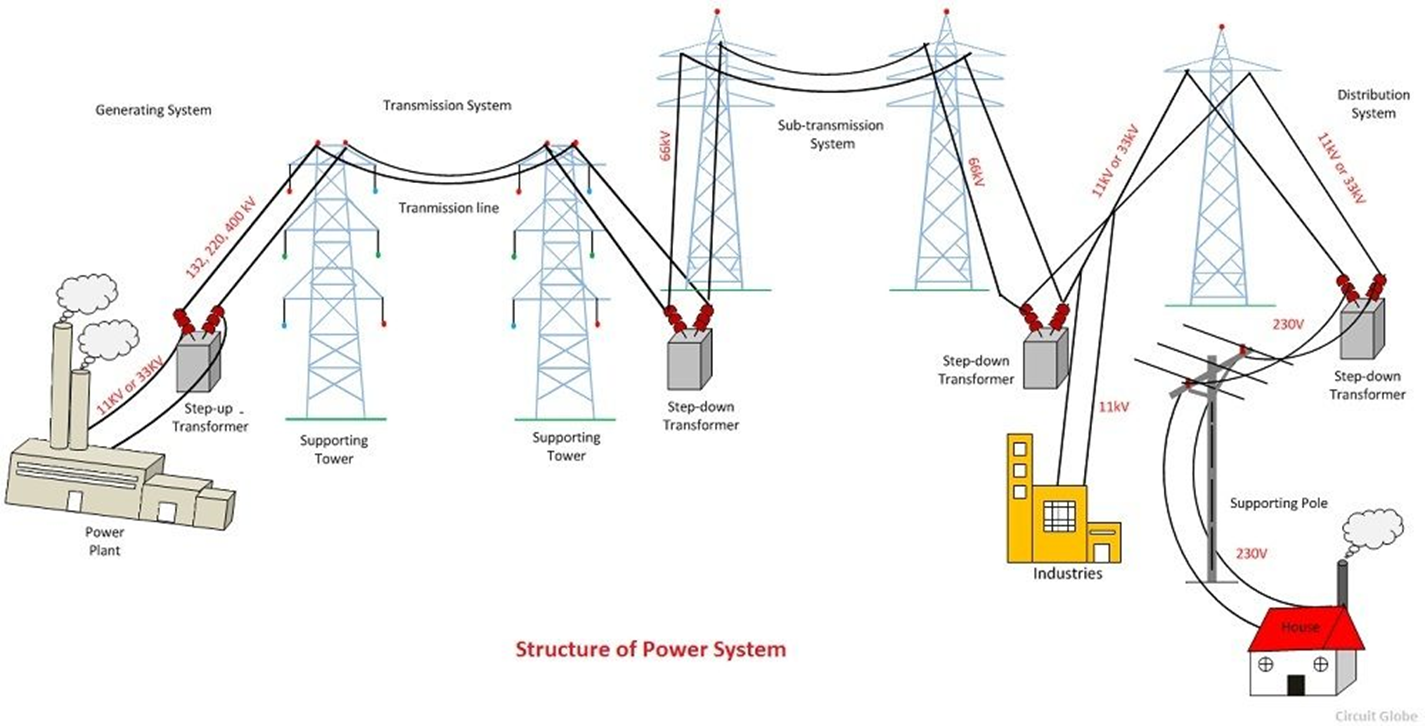

***Electrical power systems*** (or grids or networks) are extensive infrastructure developed to accommodate the generation, transmission and use of electricity by residential, industrial and commercial customers. As per the indicative structural design above, they comprise:

* electrical generators (in power plants),
* overhead and cabled conductors (on towers, underground or underwater),
* devices enabling transmission over long distances and its effective distribution within smaller locations (transformers),
* the loads served including, for example, home appliances, industrial furnaces and motors, and commercial processes and lighting, and, lastly,
* extensive equipment for the protection, stability and reliability of this system (hardware as switches and breakers, and software as monitoring and control).

The overwhelming majority of power systems are operating on ***alternating current*** (AC). AC is a form of electricity that has periodic behavior, more specifically, sinusoidal. The nature of AC in itself begs the definition of the fundamentals of power systems that are energy, active and reactive power, as also of the magnitude, phase angle and frequency of the current and voltage waveforms.


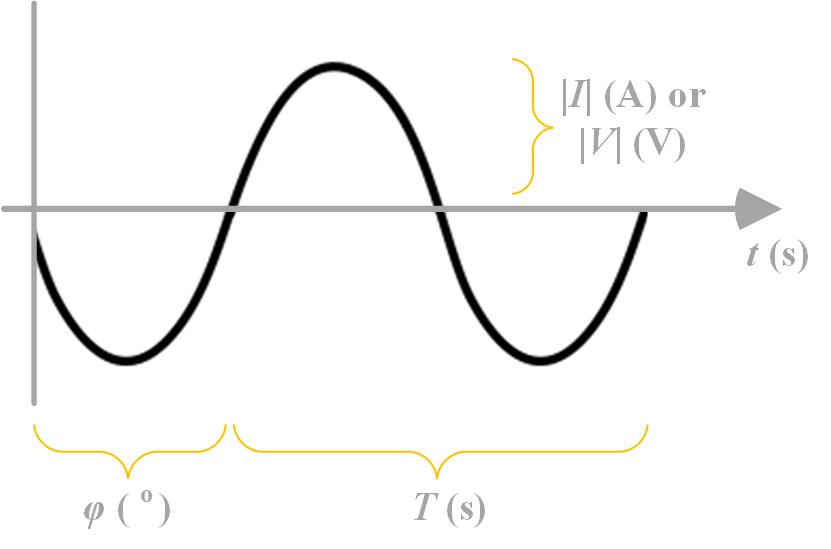

In the figure above, a current or voltage sinusoidal waveform is given, along with its ***magnitude*** either |*V*| or |*I*|, its ***phase angle*** *φ* in degrees or radians, and its ***period*** *T* in seconds (its inverse being the waveform ***frequency*** in hertz, indicated by symbol "Hz"). This waveform would be what a sensor or oscilloscope on a power outlet would detect. For most of the Americas, the voltage of a home outlet would be 120 V and at frequency of 60 Hz, while in most of the rest of the world the voltage would be 230 V and a frequency of 50 Hz.

Once a device is plugged to some electricity supply, current will flow through it and, thus, consume/generate energy, accordingly. ***Energy*** is the measure of any process through which objects or personnel exhange heat, electrical charge, experience change in movement and elevation (among other things). In more typical physics terms, energy *E* is the property of performing useful work. However, as its definition implies, *E* is an accumulation over time.

In power systems, where large electrical machines and fast-acting devices are closely coupled across space, *E* is a coarse measure of their performance. To this end, ***active power*** *P* is defined as the time derivative of *E*.

\begin{align}
P = \frac{\text{d}E}{\text{d}t}={|V|}{|I|}{\cos\phi}
\end{align}

In the following discussion we will refer to $\phi$ as $\theta$.

We return here to the earlier mention on how voltage imposed across the terminals of a device causes current flow through it and, thus, the consumptior or generation of energy.

At any given moment, a power system is reliable and stable if the total generated energy is equal to the load demand plus any losses throughout all equipment. In other words, there must be an equilibrium between active power generation, and active power demand and losses.

Within power system, losses are mostly attributed to conductors. Conductors bear impedance, which is the opposition to the flow of current through them and is defined as $Z (Impedance) =R+\text{j}X$, where $R$ is the resistance and $X$ the reactance of said conductor. In typical power systems with higher ***reactance*** $X$ compared to ***resistance*** $R$, the flow of $P$ increases the voltage phase angle  differences Δ*θ* between the points in the system this power is transmitted over. Reverting back to the waveform definition of voltage, a power line delays the propagation of the voltage waveform from its sending terminal to its receiving terminal by the phase angle *Δθ*.

It is, thus, derived that changes in active power *P* of generation and demand reflect to the electrical frequency of voltage and current across the electrical grid.

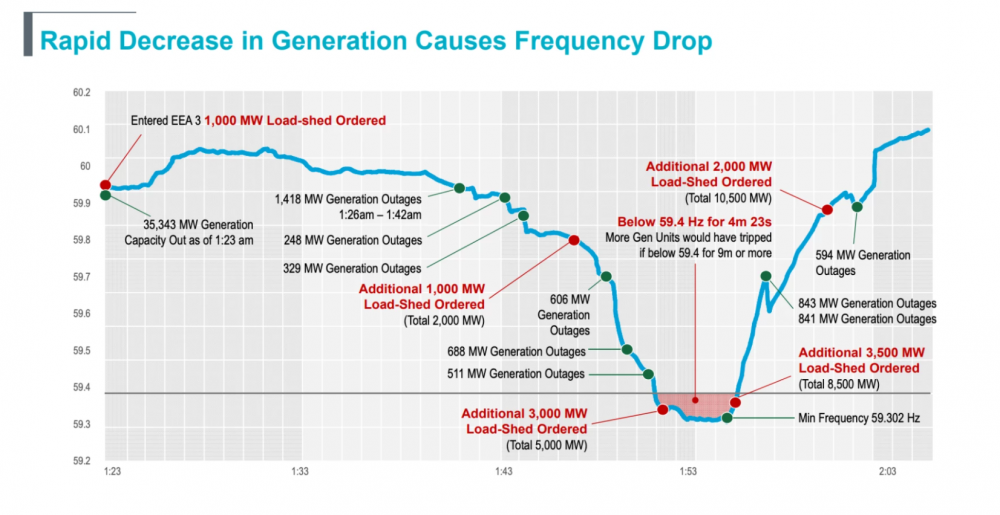

The figure above shows the behavior of the electrical frequency *f* in Texas, during winterstorm Uri in 2021, around the critical moments that a severe deficit of electricity generation was occurring. Typically, when generation does not suffices for the load demand at a given moment in time, the grid frequency will drop. This is explained by the electromechanical coupling of the rotating inertias of the conventional generators and machines with the the periodic nature of the AC; when the electromagnetic energy is lacking, some kinetic energy stored in the rotating inertias will be released (frequency reduction) to compensate accordingly. This relationship between active power *P* and voltage angle *θ* will become more apparent later when we discuss the DC Optimal Power Flow.

Another aspect of power system fundamentals that is here introduced is the voltage magnitude. As with all electrical devices (e.g. 120V as typical voltage of supply for most home US appliances), power system components can operate at certain, standardized levels of voltage magnitude. However, due to the transmission of power over conductors of non-zero impedance *Z*, voltage magnitude drops from the generator terminals down the way to load demand. Again because typical power system conductors are characterized by higher reactance *X* compared to their resistance *R*, voltage magnitude drops are attributed to the former. The losses on reactances *X*, are not of the active power kind *P*, since they represent no useful work, but mostly electromagnetic flux variation. We define this fictional type of power as ***reactive power*** *Q*. This last definition implies that for typical power systems, retaining voltage magnitude within its standardized intervals across a system requires the use and control of reactive power.

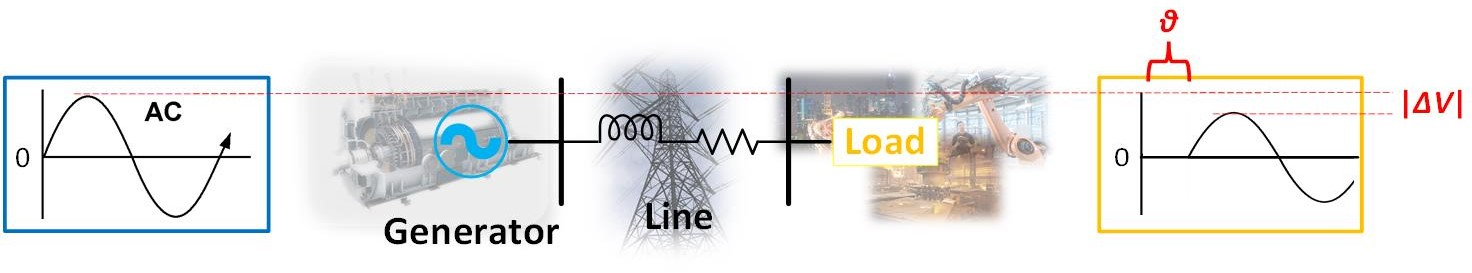

The figure above depicts the overall effect of power system operation to the voltage waveform of AC, as power transmits through a system.

# AC power flow

The power grid is designed as a network of nodes (also known as buses) connected by transmission lines. Each node can have a variety of generators, loads and storage connected to it, and transmission lines transmit energy from one node to another.



 The power flow along each line is a combination of *active* and *reactive* power. Active power is the power that can be used to do useful work and flows from the generator to the consumer. Reactive power, also known as imaginary power, goes back and forth between the generator and the load and does no useful work. A common way to represent this combination of active and reactive power is by representing it as a complex number $P + \text{j} Q$. Here, $P$ is the active power, and $Q$ is the reactive power.


The voltages and currents in the network are also represented as complex numbers. They are commonly denoted using the exponential form of complex numbers: $X e^{\text{j} \theta}$, and are referred to as *phasors*. In AC power flow, the phase angle of both the voltage and current varies with time, i.e., $\theta = \omega t + \delta$, where $t$ is the time.



In order to understand power flow, we need to understand the power network. We start by looking at an electrical model of the network:

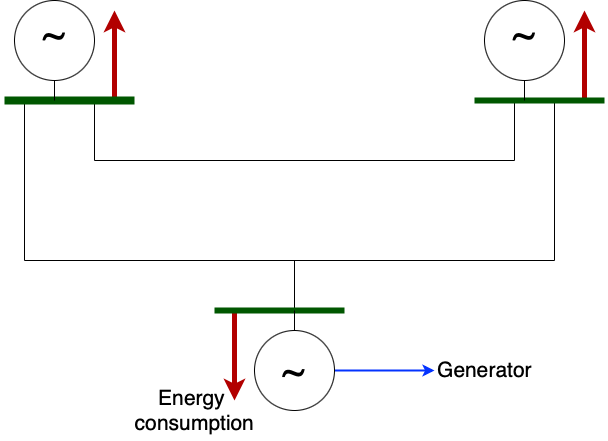

In this diagram, each green line represents a node in the power network. Each node has a generator (the circle) and a consumer (red arrow) connected to it. The consumer draws power from the node, while the generator injects power into the network from the node. The net power injection at each node is the difference between the generator output and consumer load.

### Nodes

The power injection at each node can be modeled as:


1. $\underline{I}_n$: the current injected at the n-th node
2. $\underline{V}_n$: the voltage at the n-th node
3. $\underline{S}_n$: the total power injection at the n-th node

As discussed previously, both the voltage and current are phasors whose phases vary with time. We can represent them using complex numbers, with
1. $\underline{I}_n = I_n \cos(\theta) + \text{j} I_n \sin(\theta)$
2. $\underline{V}_n = V_n \cos(\theta) + \text{j} V_n \sin(\theta)$

The relationship between the power, current and voltage is given by

$\underline{S}_n = \underline{V}_n \underline{I}_n^* = P_n + \text{j} Q_n$,

where $P_n$ is the active power injection and $Q_n$ is the reactive power injection at node $n$.


### Lines

The flow along each line in the power network is determined by the line impedance and the voltage magnitude and phase angle at the end-point nodes. We can usually model lines as a combination of resistive and inductive impedances, represented by $R_l, X_l$ respectively. This paradigm is an approximation for short lines, and the total impedance of the line is given by

$\underline{Z}_l = R_l + \text{j} X_l$

A more commonly used notion is that of 'admittance' which is simply the reciprocal of the impedance

$\underline{Y}_l = \frac{1}{\underline{Z}_l}$


The voltage difference across a line is the difference in node voltages at the endpoints, and we denote this difference by $\underline{V}_l$. We denote the current through a line by $\underline{I}_l$.

### Relating nodes and lines

We denote the connection between lines and nodes by using an admittance matrix, which is fashioned after neighbour matrices seen when describing graph structures.

1. Kirchoff's current law (short form: KCL) states that "the algebraic sum of currents entering and exiting a node must equal zero". Essentially, this means that there can be no accumulation of charge at a node - all charge that 'enters' the node must also 'exit' the node.
 From Kirchoff's current law, we have that

$\underline{I}_n = \sum\limits_{l : \text{line } l \text{ connects to node } n} \underline{I}_l $

where $\underline{I}_n$ is the net current injection from node $n$ into the network, and is positive when current is flowing from the node into the network. $\underline{I}_l$ is the current flowing along a line connected to node $n$, and is positive when current is flowing away from the node.

2. Kirchoff's voltage law (short form: KVL) states that "the sum of voltage differences around any closed loop in a circuit must be zero". Essentially, it means that if you start going around a circuit in a closed loop, you will end up at the same voltage level at which you started once you reach the end of the loop (your original starting point). From Kirchoff's voltage law, we can relate the voltage difference across each line with the current flowing through that line. Consider two nodes: $n_1$ and $n_2$, and say line $l$ connects them. Then

$(\underline{V}_{n_1} - \underline{V}_{n_2}) * \underline{Y}_l = \underline{I}_l$

##  AC power flow -> DC power flow

Solving AC power flow can be computationally expensive: for a network with $n$ nodes, the system operator would have to solve $2n$ non-linear equations at each time step. A simplified version of AC power flow can be formulated by linearising the equations, and is called DC power flow. This is commonly used for unit commitment models.

Note that DC power flow is not the same as DC power - it is simply a linearisation of AC power flow.

We use the following simplifications for a DC power flow model:

### 1. Small resistance
This means that the line is mainly an inductive load, and $\underline{Y}_l = \frac{1}{\underline{Z}_l} \sim \frac{1}{j X_l}$

### 2. Flat voltage
i.e., the magnitude of voltage at each node is 1.
$| \underline{V}_n | \sim 1 p.u.$

### 3. Small angle differences
i.e. $\sin (\delta_1 - \delta_2) \sim \delta_1 - \delta_2$, $\cos (\delta_1 - \delta_2) \sim 1$.

## DC Power flow in a line

The active power flow through a transmission line under the DC power flow assumptions is given by

$P_l = |\underline{V}_{n_1}| |\underline{V}_{n_2}| \sin (\delta_{n_1} - \delta_{n_2}) / X_l  = \frac{\delta_{n_1} - \delta_{n_2}}{X_l}$

## Economic Dispatch

Once we know the power injections on each node, the power flow is determined by physics. But how do we decide what the power injections should be? The power system operator tries to optimize the generation output of each generator in a way that it meets the energy demand at each node.

### Generator

Say there is a single generator at each node. The power output of this generator is given by $g_n$, and the cost of producing this energy is given by a cost function $C_n(g_n)$.

The generator output is constrained by the generator capacity, and

$ \underline{g}_n \leq g_n \leq \bar{g}_n$

where $\underline{g}_n$ is the lower bound and $\bar{g}_n$ is the upper bound on generator output.

### Power balance and lines

The power injection at each node is the difference between the generator output and the net power draw by consumers connected to that node, i.e.
$g_n - d_n$. The total power injection in the network should be zero.

Each line can only carry a finite amount of power. The power capacity of a line is determined by sag limits, heating, and other factors. It is modeled as

$P_l \leq \bar{f}$

We can get the power flow on each line from the DC power flow shift matrix H. Then

$H (\vec{g} - \vec{d}) \leq \bar{f}$

# Solving the OPF with Machine Learning

In [ ]:
# For reproducibility
SEED = 123
torch.manual_seed(SEED)

<a name="data-description"></a>
## Data

For the next part of the tutorial, we will be using **"OPFLearnData: Dataset for Learning AC Optimal Power Flow"**. The datasets are resulting from OPFLearn.jl, a Julia package for creating AC OPF datasets. The package was developed to provide researchers with a standardized way to efficiently create AC OPF datasets that are representative of more of the AC OPF feasible load space compared to typical dataset creation methods. The OPFLearn dataset creation method uses a relaxed AC OPF formulation to reduce the volume of the unclassified input space throughout the dataset creation process.

The dataset contains load profiles and their respective optimal primal and dual solutions. Load samples are processed using AC OPF formulations from PowerModels.jl. More information on the dataset creation method can be found in the publication, "OPF-Learn: An Open-Source Framework for Creating Representative AC Optimal Power Flow Datasets" and in the package website: https://github.com/NREL/OPFLearn.jl and https://data.nrel.gov/submissions/177.


### Data Download

The following bash script downloads the .csv file from the Case 5 and saves it to a data folder.

In [ ]:
# Download data
!mkdir data
!wget https://data.nrel.gov/system/files/177/pglib_opf_case5_pjm.csv -P data/

--2023-08-08 14:32:01--  https://data.nrel.gov/system/files/177/pglib_opf_case5_pjm.csv
Resolving data.nrel.gov (data.nrel.gov)... 76.223.107.85, 13.248.240.147
Connecting to data.nrel.gov (data.nrel.gov)|76.223.107.85|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nrel-datacat-public-prod.s3.us-west-2.amazonaws.com/files/177/pglib_opf_case5_pjm.csv?response-content-disposition=attachment%3B%20filename%3Dpglib_opf_case5_pjm.csv&X-Amz-Content-Sha256=UNSIGNED-PAYLOAD&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEOf%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEaCXVzLXdlc3QtMiJGMEQCIHnnRx3efHsyBaGI%2B%2FtPHbnsRRHxhmk6PfG16DWbNNQJAiAakRlp8GOTZvOZfLN%2F3PwZKcpraqMLX78qwSNWxNywYyq7BQiP%2F%2F%2F%2F%2F%2F%2F%2F%2F%2F8BEAAaDDk5MTQwNDk1NjE5NCIMUGraMtYM2Rnml8igKo8FeYUwGBsOjdI8sySoKMGlQh8rBzh%2BA0BD%2B9XK3uKo9gelmYT4bgfC%2FEPLePuy71IboxeZjPpX8HpyPe7sHvvVnypnaXjTqxU7%2ByOiORpl8DUwEwieP1kFdonD29k8ooo1BGFOSE6z7b5ofIoqdBQa%2BXRoj%2F9C31mE6Uq5ArFZA4B0ailA89nm%2F6gtfOot8N%2FPy0bwLMHOKpR

### Data Exploration
Now, we will look into the data that we downloaded. Take into account that this dataset is specific for a grid called Case 5 from an energy market in the US called PJM. This will be explained in the next section. For now, let's focus on getting a glimpse of the data.

In [ ]:
df = pd.read_csv('data/pglib_opf_case5_pjm.csv')

In [ ]:
df.head()

,load1:pl,load2:pl,load3:pl,load1:ql,load2:ql,load3:ql,gen1:pg,gen2:pg,gen3:pg,gen4:pg,gen5:pg,gen1:qg,gen2:qg,gen3:qg,gen4:qg,gen5:qg,gen1:vm_gen,gen2:vm_gen,gen3:vm_gen,gen4:vm_gen,gen5:vm_gen,bus1:v_bus,bus2:v_bus,bus3:v_bus,bus4:v_bus,bus5:v_bus,line1:p_to,line2:p_to,line3:p_to,line4:p_to,line5:p_to,line6:p_to,line1:q_to,line2:q_to,line3:q_to,line4:q_to,line5:q_to,line6:q_to,line1:p_fr,line2:p_fr,line3:p_fr,line4:p_fr,line5:p_fr,line6:p_fr,line1:q_fr,line2:q_fr,line3:q_fr,line4:q_fr,line5:q_fr,line6:q_fr,bus1:v_min,bus2:v_min,bus3:v_min,bus4:v_min,bus5:v_min,bus1:v_max,bus2:v_max,bus3:v_max,bus4:v_max,bus5:v_max,gen1:pg_min,gen2:pg_min,gen3:pg_min,gen4:pg_min,gen5:pg_min,gen1:pg_max,gen2:pg_max,gen3:pg_max,gen4:pg_max,gen5:pg_max,gen1:qg_min,gen2:qg_min,gen3:qg_min,gen4:qg_min,gen5:qg_min,gen1:qg_max,gen2:qg_max,gen3:qg_max,gen4:qg_max,gen5:qg_max,line1:p_to_max,line2:p_to_max,line3:p_to_max,line4:p_to_max,line5:p_to_max,line6:p_to_max,line1:q_to_max,line2:q_to_max,line3:q_to_max,line4:q_to_max,line5:q_to_max,line6:q_to_max,line1:p_fr_max,line2:p_fr_max,line3:p_fr_max,line4:p_fr_max,line5:p_fr_max,line6:p_fr_max,line1:q_fr_max,line2:q_fr_max,line3:q_fr_max,line4:q_fr_max,line5:q_fr_max,line6:q_fr_max
0,6.570765,2.275993,4.051883,4.376283,0.628149,4.026378,0.4,1.7,4.876424,1.558644,4.446794,0.3,1.275,3.533836,1.50000,3.165696,1.088747,1.088747,1.058290,1.055571,1.100000,1.0887465217628047 - 0.0005979187202320081j,1.0273423957629413 + 0.0008553048386149743j,1.0582902825264835 + 0.0003330197994084777j,1.0555708504862527 + 1.924878888556834e-33j,1.0999996715342704 - 0.0008500732306647862j,-3.326692,-1.289769,2.566725,3.261627,0.662432,1.880069,-1.791360,-1.007931,1.673939,2.740326,-0.160538,1.491757,3.364665,1.297059,-2.561724,-3.244073,-0.661196,-1.865901,2.163107,1.073268,-1.661375,-2.584923,0.165361,-1.357909,0.0,0.0,0.0,0.0,0.0,-0.000304,-0.000021,-0.000064,-0.000058,-18063.948845,0.0,0.0,0.0,0.0,0.0,-286.502534,-186.502534,-0.000010,-0.000006,-0.000002,0.0,0.0,0.0,0.0,0.000000e+00,-771.419463,-771.419463,-0.000009,-1899.693543,-0.000002,-0.000005,-5.729153e-07,0.0,0.0,0.000000e+00,0.0,-1.389604e-06,-4.592682e-07,0.000000e+00,0.0,-6.636969e-08,0.000000e+00,0.0,0.0,-0.000002,-0.000003,-2.720498e-07,-0.000006,0.000000e+00,0.0,-7.933284e-07,-1.873404e-06,0.0,-3.069352e-06
1,6.552550,1.704638,4.090173,4.400894,0.724693,3.937011,0.4,1.7,4.317437,1.531758,4.481280,0.3,1.275,3.607194,1.50000,3.123033,1.088817,1.088817,1.058152,1.056337,1.100000,1.0888172119713018 - 0.0006087167299469179j,1.0270868507989965 + 0.0008408619965881335j,1.0581515801818229 + 0.00032013919637071504j,1.0563365336339419 + 1.4459630575872765e-33j,1.0999996620692698 - 0.0008622340126773913j,-3.318376,-1.309520,2.578151,3.251734,0.640066,1.903128,-1.804294,-0.981953,1.660808,2.752058,-0.126670,1.462225,3.356343,1.316800,-2.573143,-3.234175,-0.638936,-1.888961,2.175996,1.047174,-1.648170,-2.596599,0.130443,-1.328388,0.0,0.0,0.0,0.0,0.0,-0.000306,-0.000021,-0.000064,-0.000060,-17574.258423,0.0,0.0,0.0,0.0,0.0,-286.128804,-186.128804,-0.000003,-0.000005,-0.000002,0.0,0.0,0.0,0.0,0.000000e+00,-748.740972,-748.740972,-0.000012,-1837.500388,-0.000002,-0.000005,-5.834631e-07,0.0,0.0,0.000000e+00,0.0,-1.404824e-06,-4.466478e-07,0.000000e+00,0.0,-5.232512e-08,0.000000e+00,0.0,0.0,-0.000002,-0.000003,-2.624331e-07,-0.000006,0.000000e+00,0.0,-7.848656e-07,-1.892890e-06,0.0,-2.936123e-06
2,5.645406,2.029723,5.955067,1.377338,0.865517,3.240306,0.4,1.7,5.199999,1.490930,4.900680,0.3,1.275,3.900000,1.50000,-0.967627,1.081929,1.081929,1.100000,1.064614,1.076183,1.0819281955731157 - 0.0008834644924558983j,1.0801421593649148 + 0.0003887885840341481j,1.0999999973287864 - 7.665944322312063e-5j,1.0646138905567504 + 7.618187422773062e-35j,1.0761821292491502 - 0.0011506687812971748j,-2.771022,-1.810419,2.513627,2.884599,-0.281441,2.387053,0.298736,-0.387589,-1.216583,1.756217,-1.243797,0.248956,2.789736,1.819606,-2.509342,-2.874384,0.285677,-2.372277,-0.119910,0.471873,1.223036,-1.

In [ ]:
df.shape

(10000, 104)

In [ ]:
df.columns

Index(['load1:pl', 'load2:pl', 'load3:pl', 'load1:ql', 'load2:ql', 'load3:ql',
       'gen1:pg', 'gen2:pg', 'gen3:pg', 'gen4:pg',
       ...
       'line3:p_fr_max', 'line4:p_fr_max', 'line5:p_fr_max', 'line6:p_fr_max',
       'line1:q_fr_max', 'line2:q_fr_max', 'line3:q_fr_max', 'line4:q_fr_max',
       'line5:q_fr_max', 'line6:q_fr_max'],
      dtype='object', length=104)

We can see that this is a dataset of 10000 rows by 104 columns. Each row represents a solution to a specific snapshot of a grid state, i.e., a specific output from each generator to satisfy different consumptions at each node. The columns are specified at the [OPFLearn.jl documentation](https://nrel.github.io/OPFLearn.jl/stable/results/). In general, they are divided into inputs and outputs depending on the variable.

For example, columns 0:3 represent the active power consumption for the loads, while columns 3:6 represent the reactive power consumption of the loads. We can now separate them into a variable called `inputs`.

In [ ]:
# Define input columns
load_p = list(df.columns[0:3])
load_q = list(df.columns[3:6])
inputs = load_p # + load_q
print(inputs)

['load1:pl', 'load2:pl', 'load3:pl']


Now, we can do the same with the outputs, i.e., the generators setpoint of active and reactive power, as well as the voltage magnitude at each bus.

In [ ]:
# Define output columns
gen_p = list(df.columns[6:11])
gen_q = list(df.columns[11:16])
v_m = list(df.columns[16:21])
outputs = gen_p # + gen_q + v_m
print(outputs)

['gen1:pg', 'gen2:pg', 'gen3:pg', 'gen4:pg', 'gen5:pg']


Now that we separated the data into inputs and outputs, let's take a look into each of those columns. The following function plots the histogram of each variable, so it takes the whole 10000 samples for each variable and plots the distribution. On the x axis we see the variable value, and on the y axis the frequency of samples that fit into a specific bucket or bin. We will be using 10 bins just to get an idea of the shape of the distribution. Notice that we are also annotating the mean of all the samples in black.

In [ ]:
def plot_hist_variables(variables):
    fig, axs = plt.subplots(nrows=1, ncols=len(variables), figsize=(16, 3))
    for i, input_name in enumerate(variables):
        axs[i].hist(df[input_name], bins=10)
        axs[i].set_title(input_name)
        mean_value = df[input_name].mean()
        axs[i].axvline(mean_value, color='k', linestyle='dashed', linewidth=2)
        x_offset = axs[i].get_xlim()[1] * 0.02
        y_offset = axs[i].get_ylim()[1] * 0.05
        axs[i].annotate(f"Mean: {mean_value:.2f}", xy=(mean_value, axs[i].get_ylim()[1]),
                        xytext=(mean_value+x_offset, axs[i].get_ylim()[1]-y_offset),
                        ha='left', va='top', fontsize=10,
                        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
    fig.tight_layout()
    plt.show()

#### Inputs

Active power of each load:

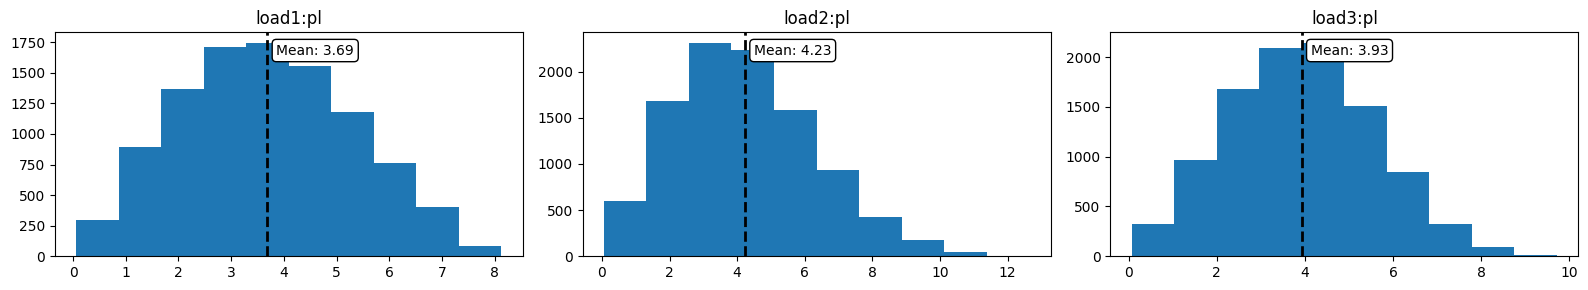

In [ ]:
plot_hist_variables(load_p)

Reactive power of each load:

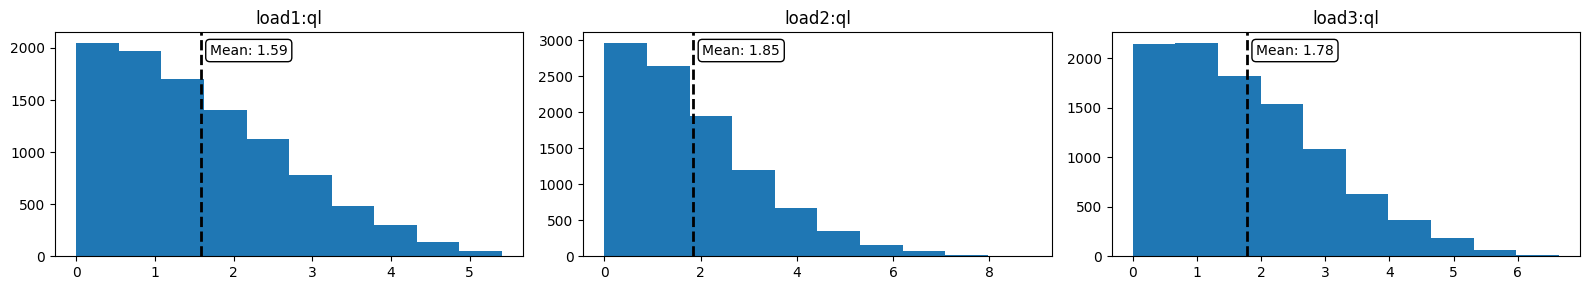

In [ ]:
plot_hist_variables(load_q)

As you can see, both active and reactive power variables are positive. This makes sense as we can't consume "negative" power by definition. However, it really depends on the convention, you will see that generators can "generate negative" reactive power. The shape of both variables are a bit different, where active power can be generalized as a `Normal` distribution, while the reactive power looks like an `Exponential` or `Log(Normal)` distribution.

#### Outputs

Active power of each generator:

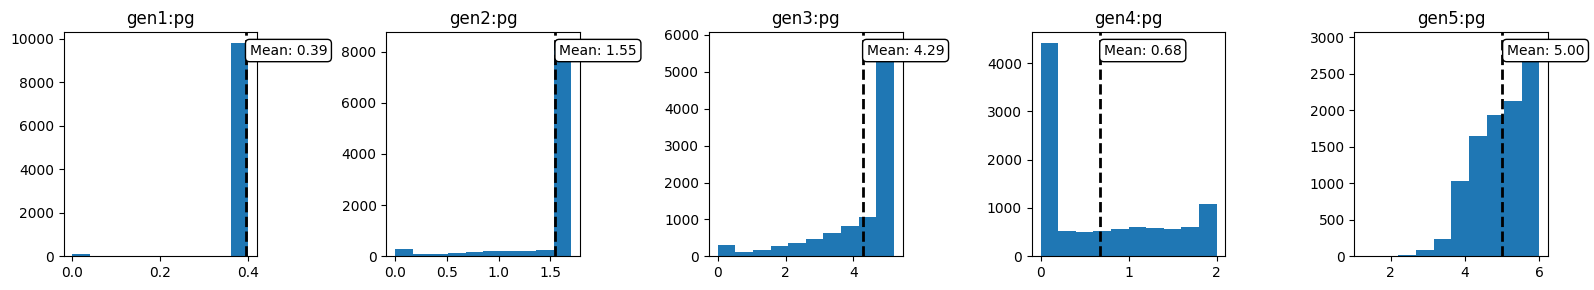

In [ ]:
plot_hist_variables(gen_p)

Reactive power of each generator:

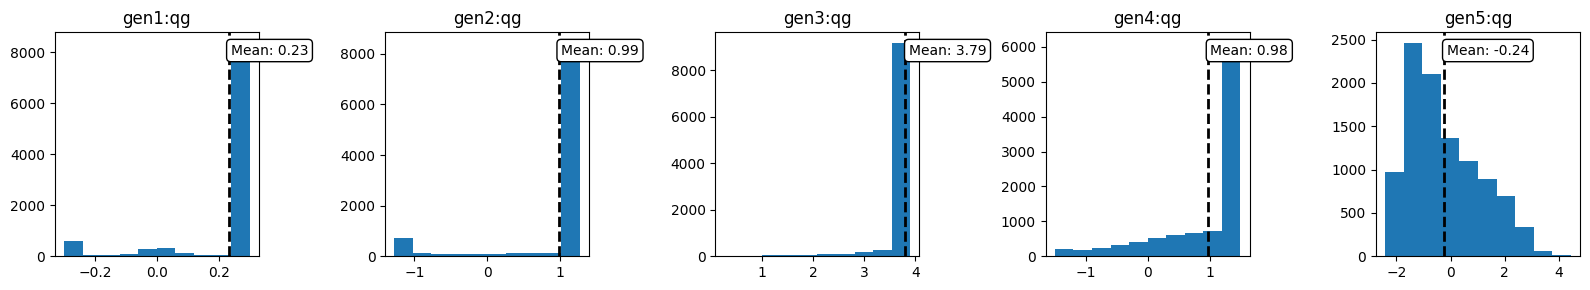

In [ ]:
plot_hist_variables(gen_q)

Voltage mangnitude at each bus:

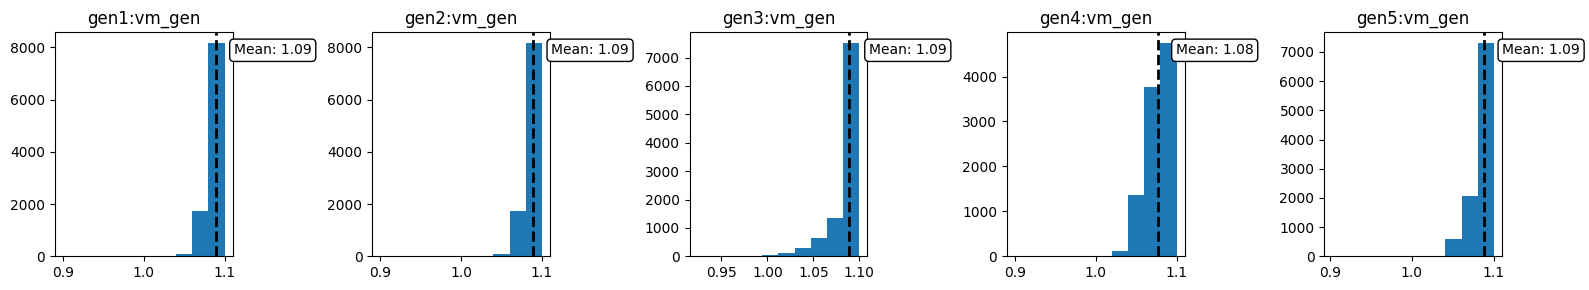

In [ ]:
plot_hist_variables(v_m)

In the case of the outputs, we can see that generators setpoints are set almost always at the same level most of the time. Notice that some generators are generating "negative" reactive power. This means, by convention, that sometimes these generators are consuming reactive power instead of generating.

In the case of voltage magnitudes, it is very constant around the mean with a few samples below that level. This is expected as the voltage magnitude is constrained by the AC OPF problem.

## Case 5 - PJM

The IEEE (Institute of Electrical and Electronics Engineers) is a professional association that organizes conferences, technical brochures, standards, etc. In general, the institute provides a direction to the sector by paving a way to discuss and advance the field. The IEEE test cases are a list of representative grids with specific behaviors that are useful for researchers to test on. There are also non-IEEE test cases. A very useful library for benchmarking OPF solutions is [Power Grid Lab](https://power-grid-lib.github.io/) from the  IEEE PES Task Force on Benchmarks for Validation of Emerging Power System Algorithms.

The PJM 5-bus system, which includes information on suggested generation bids, generation MW limits, and MW loads, was initially released in 1999 by PJM as a part of their training resources. Since then, multiple revised versions of the system have been implemented while retaining the fundamental system configuration. It was modified by Fangxing Li and Rui Bo and published at the Proceedings of the IEEE PES GM in 2010.

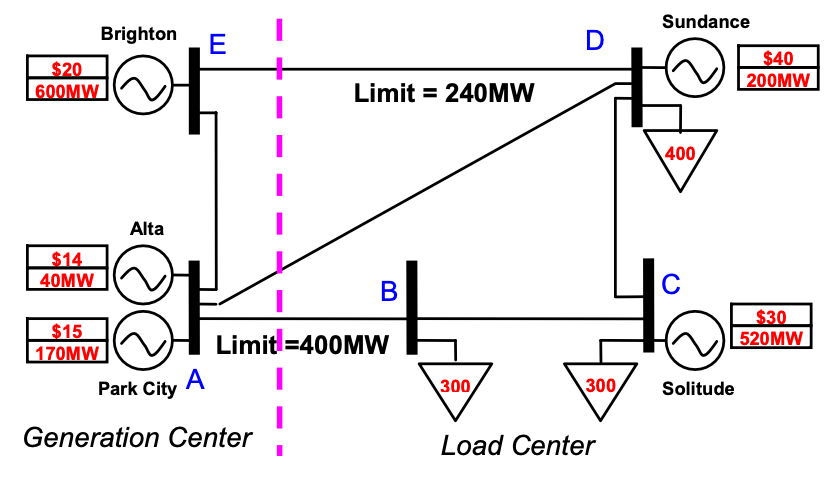

The system is a 5-bus grid with two major zones divided into generation and loads. As you can see from the figure, the nodes represent cities in Utah, MI, in the US. The case file includes a snapshot of the grid including the necessary parameters to calculate a(n) (optimal) power flow calculation. Let's analyze the data step-by-step.

In [ ]:
# Load the network for Case5
net = pp.networks.case5()
print(net)

This pandapower network includes the following parameter tables:
   - bus (5 element)
   - load (3 element)
   - sgen (1 elements)
   - gen (3 element)
   - ext_grid (1 elements)
   - line (6 element)
   - poly_cost (5 element)
   - bus_geodata (5 element)


As you can see, the network includes 5 buses, 5 generators (sgen, gen, and ext_grid), 6 lines, and 3 loads.

In [ ]:
net.bus

,name,vn_kv,type,zone,in_service,max_vm_pu,min_vm_pu
0,0,230.0,b,1.0,True,1.1,0.9
1,1,230.0,b,1.0,True,1.1,0.9
2,2,230.0,b,1.0,True,1.1,0.9
3,3,230.0,b,1.0,True,1.1,0.9
4,4,230.0,b,1.0,True,1.1,0.9


There are 5 buses in the system, all of them on the same voltage level at 230 kV and in the same zone (1). The voltage can oscillate between 0.9 and 1.1 per unit.

In [ ]:
net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type,controllable
0,None,1,300.0,98.61,0.0,0.0,NaN,1.0,True,None,False
1,None,2,300.0,98.61,0.0,0.0,NaN,1.0,True,None,False
2,None,3,400.0,131.47,0.0,0.0,NaN,1.0,True,None,False


There are three loads with active (MW) and reactive (VAr) power, the biggest is the load at bus 3 with a maximum power consumption of 400 MW.

In [ ]:
net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source,controllable,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,None,0,170.0,0.0,NaN,1.0,True,,True,True,170.0,0.0,127.5,-127.5


In [ ]:
net.gen

,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,slack_weight,type,controllable,max_p_mw,min_p_mw
0,None,0,40.00,1.0,NaN,-30.0,30.0,1.0,False,True,0.0,None,True,40.0,0.0
1,None,2,323.49,1.0,NaN,-390.0,390.0,1.0,False,True,0.0,None,True,520.0,0.0
2,None,4,466.51,1.0,NaN,-450.0,450.0,1.0,False,True,0.0,None,True,600.0,0.0


In [ ]:
net.ext_grid

,name,bus,vm_pu,va_degree,slack_weight,in_service,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,None,3,1.0,0.0,1.0,True,200.0,0.0,150.0,-150.0


Then, we see the generators with different maximum levels of active and reactive power. Notice that the bus variables indicates where the generator is connected on the grid.

In [ ]:
net.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service,max_loading_percent
0,None,None,0,1,1.0,1.48649,14.8649,35.702054,0.0,1.004087,1.0,1,ol,True,100.0
1,None,None,0,3,1.0,1.60816,16.0816,32.994314,0.0,99999.000000,1.0,1,ol,True,100.0
2,None,None,0,4,1.0,0.33856,3.3856,156.748063,0.0,99999.000000,1.0,1,ol,True,100.0
3,None,None,1,2,1.0,0.57132,5.7132,92.865455,0.0,99999.000000,1.0,1,ol,True,100.0
4,None,None,2,3,1.0,1.57113,15.7113,33.796607,0.0,99999.000000,1.0,1,ol,True,100.0
5,None,None,3,4,1.0,1.57113,15.7113,33.796607,0.0,0.602452,1.0,1,ol,True,100.0


Now, we have 6 lines connecting `from_bus` to `to_bus` with some specific parameters, e.g. resistance (`r_ohm_per_km`) and reactance (`x_ohm_per_km`).

In [ ]:
net.poly_cost

,element,et,cp0_eur,cp1_eur_per_mw,cp2_eur_per_mw2,cq0_eur,cq1_eur_per_mvar,cq2_eur_per_mvar2
0,0,gen,0.0,14.0,0.0,0.0,0.0,0.0
1,0,sgen,0.0,15.0,0.0,0.0,0.0,0.0
2,1,gen,0.0,30.0,0.0,0.0,0.0,0.0
3,0,ext_grid,0.0,40.0,0.0,0.0,0.0,0.0
4,2,gen,0.0,10.0,0.0,0.0,0.0,0.0


Up until this point, the grid data is static just as a snapshot, and includes data for all parameters, e.g., minimum and maximum voltage at each node, minimum and maximum active and reactive power generation, generation costs, etc.

After looking at the data, we can run a power flow calculation for the snapshot of the grid and visualize the grid in this specific state.

In [ ]:
# First plot the grid with static data
simple_plotly(net)

In [ ]:
# Run power flow to get results
res = pp.runpp(net)

In [ ]:
# Plot the result of the power flow calculations
pf_res_plotly(net)

/usr/local/lib/python3.10/dist-packages/pandapower/plotting/plotly/pf_res_plotly.py:164: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [ ]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.000000,3.273361,-210.00000,-30.725160
1,0.989261,-0.759269,300.00000,98.610000
2,1.000000,-0.492259,-23.49000,-96.044720
3,1.000000,0.000000,394.97282,-52.652930
4,1.000000,4.112031,-466.51000,38.209623


The power injection and consumption at each bus is very different for each node, but the voltage magnitude is almost constant at 1.0 p.u.

In [ ]:
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,249.773373,21.599095,-248.006760,-4.637368,1.766612,16.961728,0.629326,0.629419,0.629419,1.000000,3.273361,0.989261,-0.759269,62.685695
1,186.500142,-13.612148,-185.437396,23.581606,1.062746,9.969458,0.469401,0.469237,0.469401,1.000000,3.273361,1.000000,0.000000,0.000469
2,-226.273515,22.738212,226.604972,-22.549636,0.331458,0.188576,0.570857,0.571637,0.571637,1.000000,3.273361,1.000000,4.112031,0.000572
3,-51.993240,-93.972632,52.118657,93.394588,0.125417,-0.578044,0.272517,0.268475,0.272517,0.989261,-0.759269,1.000000,-0.492259,0.000273
4,-28.628657,2.650132,28.653264,-3.078060,0.024607,-0.427929,0.072171,0.072340,0.072340,1.000000,-0.492259,1.000000,0.000000,0.000072
5,-238.188688,32.149384,239.905028,-15.659987,1.716340,16.489397,0.603327,0.603496,0.603496,1.000000,0.000000,1.000000,4.112031,100.173164


Line loadings are also very different, where lines 0 and 5 are very loaded, while the rest are almost empty.

In [ ]:
net.res_gen

,p_mw,q_mvar,va_degree,vm_pu
0,40.00,30.725160,3.273361,1.0
1,323.49,194.654720,-0.492259,1.0
2,466.51,-38.209623,4.112031,1.0


In [ ]:
net.res_ext_grid

,p_mw,q_mvar
0,5.02718,184.12293


In [ ]:
net.res_sgen

,p_mw,q_mvar
0,170.0,0.0


The solution of the AC OPF provides a setpoint for generators to satisfy a specific consumption state. It depends on the problem setup AC OPF to define if we can relax some constraints or not, e.g., line loadings and voltage magnitudes.

<a name="training"></a>
## Training

Now that we solved a specific case of the grid, we can now think about other consumption cases. As we know, we don't consume the same level of electricity at our houses all the time, the same happens at industrial facilities or public lightning. The grid is always changing and every second the grid operator must balance the generation with the consumption to keep grid stability. Given that the real-world grid is very very big and complex, the solution of the ACOPF becomes cumbersome as the complexity of the problem increases and the computation to solve it is very high.

Since the grid operators need to actively manage the grid to prevent congestions or even blackouts, there is a need for quicker solvers or approximations to the ACOPF. For example. this can be tackled by relaxing the ACOPF into a DCOPF as we saw in the previous section of the tutorial.

Another idea would be to use an abstract function approximation which solves the problem for us in much less time than the actual optimization problem as the ACOPF. Thanks to recent advances in Machine Learning, we can make use of different algorithms to do this. In this tutorial we will use a Neural Network to approximate the ACOPF solution.

Let's prepare the neural network we want to use to solve the AC OPF, we will use a vanilla NN for this tutorial.

In [ ]:
torch.cuda.is_available()

False

In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self, x_size=3, y_size=5):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(x_size, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, y_size)
        )

    def forward(self, x):
        y_hat = self.linear_relu_stack(x)
        return y_hat

model = NeuralNetwork(x_size=len(inputs), y_size=len(outputs)).to(device)

Using cpu device


In [ ]:
len(inputs)

3

In [ ]:
len(outputs)

5

### Optimization loop

Now let's define a few functions to help us train a neural network. Notice that we will be choosing a few objects that could be changed, together with the hyperparameters: optimizer, batch size, number of epochs, and loss function.

In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

Now, we can define the training and testing functions:

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 5 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
    test_loss /= num_batches
    print(f"Test Error: \n Avg loss: {test_loss:>8f} \n")

For the data, we will pack the pandas DataFrame into a Pytorch Dataloader object and split the dataset into training and test using an 80/20 split.

In [ ]:
class OPFDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        input = torch.tensor(self.data.iloc[idx, 0:3].values).to(torch.float32)
        output = torch.tensor(self.data.iloc[idx, 3:].values).to(torch.float32)
        return input, output

In [ ]:
df[inputs + outputs].head()

,load1:pl,load2:pl,load3:pl,gen1:pg,gen2:pg,gen3:pg,gen4:pg,gen5:pg
0,6.570765,2.275993,4.051883,0.4,1.7,4.876424,1.558644,4.446794
1,6.552550,1.704638,4.090173,0.4,1.7,4.317437,1.531758,4.481280
2,5.645406,2.029723,5.955067,0.4,1.7,5.199999,1.490930,4.900680
3,4.778645,2.417017,6.361179,0.4,1.7,5.200000,1.644658,4.670016
4,5.690040,2.458801,5.745494,0.4,1.7,5.200000,1.684051,4.970168


In [ ]:
data = df[inputs + outputs]
train_data = data.sample(frac=0.8, random_state=SEED)
test_data = data.drop(train_data.index)

In [ ]:
train_data.shape

(8000, 8)

In [ ]:
test_data.shape

(2000, 8)

In [ ]:
train_data.head()

,load1:pl,load2:pl,load3:pl,gen1:pg,gen2:pg,gen3:pg,gen4:pg,gen5:pg
2656,5.459669,5.331558,1.862155,0.4,1.3357,5.004201,0.000000e+00,6.000000
445,3.688071,2.868278,4.369551,0.4,1.7000,4.245082,1.956643e-07,4.624049
9505,5.386799,2.581453,5.802774,0.4,1.7000,5.200000,1.564669e+00,4.966009
332,3.628444,1.722015,5.822711,0.4,1.7000,3.620129,1.256860e+00,4.242652
4168,1.654261,3.143933,4.036312,0.4,1.7000,2.382679,1.304216e-07,4.392471


Then, we define a dataset and put them into dataloaders:

In [ ]:
train_dataloader = DataLoader(OPFDataset(train_data), batch_size=264, shuffle=True)
test_dataloader = DataLoader(OPFDataset(test_data), batch_size=264, shuffle=True)

### Training

Finally, let's train the neural network to fit out dataset:

In [ ]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 10.029011  [  264/ 8000]
loss: 9.292784  [ 1584/ 8000]
loss: 8.191648  [ 2904/ 8000]
loss: 7.285208  [ 4224/ 8000]
loss: 6.287081  [ 5544/ 8000]
loss: 5.285723  [ 6864/ 8000]
loss: 4.242595  [ 2480/ 8000]
Test Error: 
 Avg loss: 4.036133 

Epoch 2
-------------------------------
loss: 3.973420  [  264/ 8000]
loss: 3.152090  [ 1584/ 8000]
loss: 2.265266  [ 2904/ 8000]
loss: 1.520012  [ 4224/ 8000]
loss: 0.993450  [ 5544/ 8000]
loss: 0.653027  [ 6864/ 8000]
loss: 0.528352  [ 2480/ 8000]
Test Error: 
 Avg loss: 0.500519 

Epoch 3
-------------------------------
loss: 0.491499  [  264/ 8000]
loss: 0.445044  [ 1584/ 8000]
loss: 0.492930  [ 2904/ 8000]
loss: 0.498070  [ 4224/ 8000]
loss: 0.499047  [ 5544/ 8000]
loss: 0.401780  [ 6864/ 8000]
loss: 0.433414  [ 2480/ 8000]
Test Error: 
 Avg loss: 0.433008 

Epoch 4
-------------------------------
loss: 0.438359  [  264/ 8000]
loss: 0.419053  [ 1584/ 8000]
loss: 0.404194  [ 2904/ 8000]
loss: 0.433618

<a name="results-and-discussion"></a>
# Results & Discussion

Now that we have a trained model to "solve" the ACOPF, let's take a look at a single snapshot. What do you think about the metric that we used to train the network?

In [ ]:
batch_snapshot = next(iter(test_dataloader))

In [ ]:
snapshot_x, snapshot_y = batch_snapshot[0][0], batch_snapshot[1][0]

This is a single snapshot of a sample where the three loads take these values:

In [ ]:
snapshot_x

tensor([6.5026, 4.0102, 2.6787])

And the corresponding solution of the AC OPF, i.e. generators levels of active power:

In [ ]:
snapshot_y

tensor([0.4000, 1.4400, 5.2000, 0.2290, 6.0000])

Now, we can compute the difference of the prediction using our metric:

In [ ]:
with torch.no_grad():
    snapshot_pred = model(snapshot_x.to(device))

In [ ]:
snapshot_pred

tensor([0.4478, 1.3390, 4.6847, 0.2784, 6.4248])

A simple comparison of the prediction and the real solution:

In [ ]:
snapshot_pred - snapshot_y.to(device)

tensor([ 0.0478, -0.1010, -0.5153,  0.0494,  0.4248])

This would tell us the MSE of our solution vs. the real AC OPF solution:

In [ ]:
loss_fn(snapshot_pred, snapshot_y.to(device))

tensor(0.0922)

What do you think about this metric? Can we do something better?

Remember that by solving the ACOPF, the objective function is defined as the cost of generating energy. Can you calculate the grid cost using the information from `net.poly_cost`?

In [ ]:
def calculate_grid_cost():
    """Function to calculate grid costs based on generator levels."""
    pass

In [ ]:
grid_cost = calculate_grid_cost()
print(f"grid_cost = ")

grid_cost = 


Also, an important issue is that we can't explicitly set a constraint inside a Neural Network, but our solution is bounded by the capacity of the generators (min and max). Can you calculate the feasibility of a specific solution? You can use the data from the column `max_p_mw` from the tables `net.gen`, `net.sgen`, and `net.ext_grid`.

In [ ]:
def calculate_constraint_feasibility():
    """Function to calculate the feasibility of a solution.

    This can be different depending on how the problem is set up.
    For now, just take the feasibility of the prediction compared
    to the minimum and maximum values of the generators.
    """
    pass

In [ ]:
feasibility = calculate_constraint_feasibility()
print(f"feasibility = ")

feasibility = 


## (Optional) Food for thought

- Try changing a few hyperparameters to see how your network trains.
- What if we add more inputs and outputs? For now, we only solved for generation active, you can try adding reactive power into the equation :)
- What would happen if the grid was bigger? Would it take longer to solve?
- How good is your solution? Is it a global solution or a local minima?
- Can we verify the worst-case scenario given that there are no guarantees with NNs?
- Can we use some kind of inductive bias to train it faster?
- Can you think about extra terms on the loss function to better evaluate the solution?

## Limitations and Takeaways

When it comes to solving the AC Optimal Power Flow (AC OPF) problem using neural networks, there are specific limitations and important takeaways to consider:

**Limitations:**

- Data Availability: The AC OPF problem requires a significant amount of data, including historical power system operating conditions and corresponding optimal solutions. Collecting such data can be challenging, as real-world power system data is often limited, sensitive, and subject to privacy concerns.
- Model Complexity: The AC OPF problem is a complex optimization problem with numerous constraints and nonlinear equations. Representing the problem accurately using neural networks requires careful consideration of the model architecture, input representation, and output formulation.
- Generalization: The neural network model developed for AC OPF may have limitations in generalizing to unseen operating conditions or system configurations. Care should be taken to ensure the model's performance and accuracy across a wide range of scenarios.
- Training Time: Training neural networks for AC OPF can be computationally intensive, particularly for large-scale power systems. The time required to train the model should be taken into account, as it can be a significant limitation for practical implementation.


**Important Takeaways:**

- Data Preprocessing: Data preprocessing is crucial for AC OPF using neural networks. It involves selecting appropriate input features, scaling or normalizing the data, and handling missing or noisy data. Preprocessing techniques should preserve the physical and operational characteristics of the power system.
- Model Design: Designing an effective neural network architecture for AC OPF requires a deep understanding of power system dynamics, constraints, and optimization techniques. Incorporating domain knowledge and constraints into the model design can improve its accuracy and applicability.
- Loss Function Design: Defining an appropriate loss function is critical for training the neural network. The loss function should incorporate the objective of the AC OPF problem, such as minimizing generation costs or system losses, while satisfying operational constraints.
- Validation and Testing: It is essential to rigorously validate and test the trained neural network model using representative datasets. This helps assess its generalization capabilities and performance under various operating conditions and system configurations.
Integration with Power System Tools: Neural network models for AC OPF can be integrated into existing power system analysis and optimization tools. This integration enables seamless utilization of the trained models in practical power system operation and planning workflows.

These limitations and takeaways highlight the challenges and considerations when applying neural networks to solve the AC Optimal Power Flow problem. Understanding the unique aspects of the AC OPF problem and leveraging domain knowledge are crucial for developing accurate and reliable models that can assist in power system decision-making processes.

## Next Steps


There are several potential next steps you can consider to further enhance your knowledge and skills in the field of machine learning and power systems:

- Explore Different Datasets: While the tutorial focuses on the Csae5 dataset, you can explore other datasets relevant. For power systems, you can explore publicly available power system datasets or consider working with real-world power system data to solve specific problems.

- Experiment with Different Neural Network Architectures: You can experiment with different neural network architectures beyond the simple architecture demonstrated in the tutorial. You can explore convolutional neural networks (CNNs), recurrent neural networks (RNNs), or more advanced architectures like transformers to address specific tasks or challenges in the domain.

- Apply Transfer Learning: Transfer learning is a powerful technique that allows leveraging pre-trained models on large datasets and adapting them to specific tasks or domains with limited data. You can explore transfer learning approaches and apply them to power system-related tasks, such as load forecasting or fault detection.

- Dive into Advanced Topics: Machine learning and power systems offer a wide range of advanced topics to explore. You can delve deeper into areas like reinforcement learning for power system control, time-series forecasting models, generative models for synthetic data generation, or explainable AI techniques for interpretability in power system decision-making.

- Participate in Competitions and Challenges: Engaging in machine learning competitions or challenges related to power systems can provide valuable hands-on experience and help sharpen skills. Learning to Run a Power Network (L2RPN) and CityLearn are two very good examples of power systems competitions.

- Pursue Research or Projects: you can consider pursuing research or projects related to machine learning and power systems. You can identify specific problems or areas of interest within power systems, develop innovative approaches, and contribute to advancing the field through publications or practical implementations.

- Join Online Communities and Attend Events: Engaging with online communities and participating in relevant forums or discussion groups can foster learning, collaboration, and networking. Additionally, attending conferences, workshops, or webinars focused on machine learning and power systems can provide opportunities to connect with experts, gain insights, and stay updated with the latest advancements.

Overall, the tutorial serves as a stepping stone, and you can build upon the foundational knowledge gained to explore more advanced topics, pursue practical applications, and actively contribute to the intersection of machine learning and power systems.

<a name="references"></a>
# References

*   OPFLearnData: Dataset for Learning AC Optimal Power Flow. https://data.nrel.gov/submissions/177 and https://nrel.github.io/OPFLearn.jl/stable/
*   **Paper:** F.Li and R.Bo, "Small Test Systems for Power System Economic Studies", Proceedings of the 2010 IEEE Power & Energy Society General Meeting
*   **Case file (.m format):** https://github.com/power-grid-lib/pglib-opf/blob/master/pglib_opf_case5_pjm.m


